# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

In [41]:
#all imports
import tensorflow as tf
import numpy as np
import pandas as pd

import pickle
import time
import random
import matplotlib.pyplot as plt

from skimage import io
from skimage import transform as trans
from sklearn.utils import shuffle

from skimage.transform import rescale
import random
import cv2

from tensorflow.contrib.layers import flatten

In [2]:
#notebook paramters
EPOCHS = 120
BATCH_SIZE = 128

#image color channels
COLOR_CHANNELS = 1

---
## Step 0: Load The Data

In [3]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./data/train.p"
validation_file= "./data/valid.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#read csv with sign names
sign_names_df = pd.read_csv("./signnames.csv")

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Label:  12 Name:  Priority road


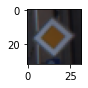

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print('Label: ', y_train[index], 'Name: ', sign_names_df[sign_names_df.ClassId == y_train[index]].SignName.iloc[0])

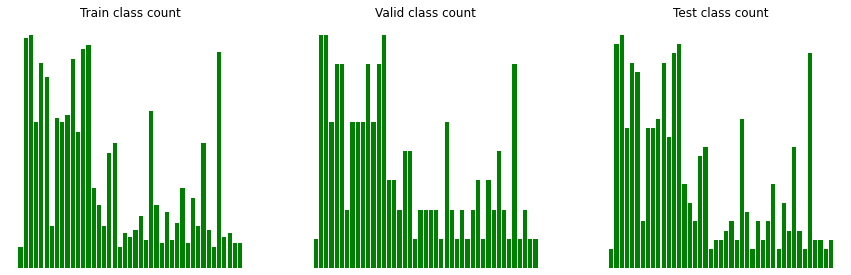

In [22]:
# plot class counts

class_arr= []
samples_arr_train=[]
samples_arr_valid=[]
samples_arr_test=[]

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    class_arr.append(class_n)
    samples_arr_train.append( len(class_indices[0]) )
    
    class_indices = np.where(y_valid == class_n)
    samples_arr_valid.append( len(class_indices[0]) )
    
    class_indices = np.where(y_test == class_n)
    samples_arr_test.append( len(class_indices[0]) )
    
fig, axes = plt.subplots(1, 3, figsize = (15, 4.5))

axes[0].set_axis_off()
axes[0].bar( class_arr, samples_arr_train,align='center', color = "green")
axes[0].title.set_text('Train class count')

axes[1].set_axis_off()
axes[1].bar( class_arr, samples_arr_valid,align='center', color = "green")
axes[1].title.set_text('Valid class count')

axes[2].set_axis_off()
axes[2].bar( class_arr, samples_arr_test,align='center', color = "green")
axes[2].title.set_text('Test class count')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [14]:
def normalize_data(data):
    #select axis to sum over (depends if input data is a single image (ax=2) or list of images ax=3)
    input_axis = 3
    if (len(data.shape) != 4):
        input_axis = 2
    #turn to grayscale
    if (COLOR_CHANNELS == 1):
        data = np.sum(data/np.float32(3), axis=input_axis, keepdims=True)
    #normalize to be between 0 and 1
    data = data/np.float32(255)
    return data

In [24]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#nomralize / change colors as per settings
X_train_p = normalize_data(X_train) #X_train
X_valid_p = normalize_data(X_valid) #X_valid
X_test_p = normalize_data(X_test) #X_test

y_train_p = y_train

### Image Augmentation

In [25]:
#Helper Functions

# rotate images

#rotate by random angles
# takes original image data and return augmented version
def rotate_images(image_data):
    # Tensorflow random angle rotation
    input_size = image_data.shape[1]
    side_size = int(np.sqrt(input_size))

    images = tf.placeholder(tf.float32, (None, 32, 32, COLOR_CHANNELS), name="images")
    random_angles = tf.random.uniform(shape = (tf.shape(images)[0], ), minval = -np.pi / 8, maxval = np.pi / 8, name="random_angles")

    rotated_images = tf.contrib.image.transform(
        images,
        tf.contrib.image.angles_to_projective_transforms(
            random_angles, tf.cast(tf.shape(images)[1], tf.float32), tf.cast(tf
                .shape(images)[2], tf.float32)
        ), name="rotated_images")

    sess = tf.Session()
    result = sess.run(rotated_images, feed_dict = {
        images: image_data,
    })
    return result

#iamge shear
def shear_images(image_data):
    
    images = tf.placeholder(tf.float32, (None, 32, 32, COLOR_CHANNELS), name="images")

    afine_tf = trans.AffineTransform(shear=0.2)
    transformed = tf.contrib.image.matrices_to_flat_transforms(tf.linalg.inv(afine_tf.params))
    transformed = tf.cast(transformed, tf.float32)
    sheared_images = tf.contrib.image.transform(images, transformed)  # Image here is a tensor 

    sess = tf.Session()
    sheared_images_result = sess.run(sheared_images, feed_dict = {
        images: image_data,
    })
    return sheared_images_result

def flip_updown_images(image_data):
    fliped_updown = []
    for i in range(len(image_data)):
        fliped_updown.append(np.flipud(image_data[i]))
    return fliped_updown

def flip_leftright_images(image_data):
    fliped_leftright = []
    for i in range(len(image_data)):
        fliped_leftright.append(np.fliplr(image_data[i]))
    return fliped_leftright

#2x zoom and pick random segment of image
def random_zoom(img):
    img_section = random.randrange(0, 4, 1)
    #rescale
    result = rescale(img, (2,2,1))
    if img_section == 0:
        result = result[0:32,0:32,:]
    elif img_section == 1:
        result = result[32:64,0:32,:]
    elif img_section == 2:
        result = result[0:32,32:64,:]
    else:
        result = result[32:64,32:64,:]
    return result

#1.5 zoom into the center of the image
def random_zoom_small(img):
    img_section = random.randrange(0, 4, 1)
    #rescale
    result = rescale(img, (1.5,1.5,1))
    return result[8:40,8:40,:]

def zoom_images(image_data):
    zoomed = []

    for i in range(len(image_data)):
        zoomed.append(random_zoom_small(image_data[i]))
    
    return zoomed

def test_augmentation(orginal_data, augmented_data):
    # Print 10 random samples
    fig, axes = plt.subplots(2, 10, figsize = (15, 4.5))
    choice = np.random.choice(range(len(X_train_p)), 10)
    for k in range(10):
        axes[0][k].set_axis_off()
        axes[0][k].imshow(orginal_data[choice[k, ]]) #, interpolation = 'nearest', \
        #cmap = 'gray')
        axes[1][k].set_axis_off()
        axes[1][k].imshow(augmented_data[choice[k, ]]) #, interpolation = 'nearest', cmap = 'gray')

In [26]:
# run augmentations
rotated_img = rotate_images(X_train_p)
sheared_img = shear_images(X_train_p)
zoomed_img = zoom_images(X_train_p)

#zoomed, rotated and shear
X_train_p2 = np.append(X_train_p,zoomed_img,axis=0)
y_train_p2 = np.append(y_train_p,y_train_p)

X_train_p2 = np.append(X_train_p2,rotated_img,axis=0)
y_train_p2 = np.append(y_train_p2,y_train_p)

X_train_p = np.append(X_train_p2,sheared_img,axis=0)
y_train_p = np.append(y_train_p2,y_train_p)

Total train size:  139196


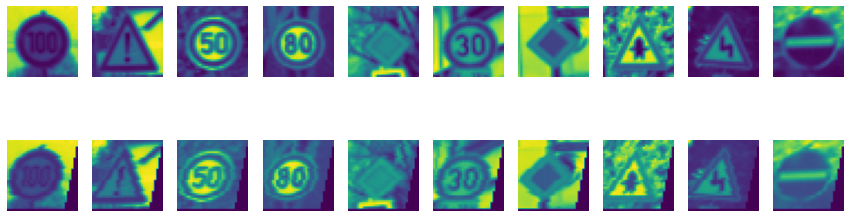

In [27]:
#final check data 
print("Total train size: ",len(X_train_p))

fig, axes = plt.subplots(2, 10, figsize = (15, 4.5))
choice = np.random.choice(range(34799), 10)

for k in range(10):
    axes[0][k].set_axis_off()
    axes[0][k].imshow(X_train_p[choice[k,]]) #, interpolation = 'nearest', \
    #cmap = 'gray')
    axes[1][k].set_axis_off()
    axes[1][k].imshow(X_train_p[choice[k,]+34799*3]) #, interpolation = 'nearest', cmap = 'gray')
    


### Model Architecture

In [42]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def LeNet(x, dropout_keep_prob = 0.5):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    ## TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias
    k_output = 6
    weight = tf.Variable(tf.truncated_normal( [5, 5, COLOR_CHANNELS, k_output], mean = mu, stddev = sigma ), name="weight1")
    bias = tf.Variable(tf.zeros(k_output), name="bias1")
    network = tf.nn.conv2d(x, weight, strides=[1, 1, 1, 1], padding='VALID') # Apply Convolution
    network = tf.nn.bias_add(network, bias) # Add bias
    # TODO: Activation.
    network = tf.nn.relu(network)
    #network = tf.nn.dropout(network, 0.5)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    network = tf.nn.max_pool(network, ksize= [1,2,2,1], strides= [1,2,2,1], padding= 'VALID')

    ## TODO: Layer 2: Convolutional. Output = 10x10x16.
    k_output = 16
    weight = tf.Variable(tf.truncated_normal( [5, 5, 6, k_output], mean = mu, stddev = sigma ), name="weight2")
    bias = tf.Variable(tf.zeros(k_output), name="bias2")
    network = tf.nn.conv2d(network, weight, strides=[1, 1, 1, 1], padding='VALID') # Apply Convolution
    network = tf.nn.bias_add(network, bias) # Add bias
    # TODO: Activation.
    network = tf.nn.relu(network)
    #network = tf.nn.dropout(network, 0.5)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    network = tf.nn.max_pool(network, ksize= [1,2,2,1], strides= [1,2,2,1], padding= 'VALID')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    #network   = flatten(network)
    
    ### TEST
    ## TODO: Layer 2.5: Convolutional. Output = 10x10x16.
    k_output = 100
    weight = tf.Variable(tf.truncated_normal( [2, 2, 16, k_output], mean = mu, stddev = sigma ), name="weight3")
    bias = tf.Variable(tf.zeros(k_output), name="bias3")
    network = tf.nn.conv2d(network, weight, strides=[1, 1, 1, 1], padding='VALID') # Apply Convolution
    network = tf.nn.bias_add(network, bias) # Add bias
    # TODO: Activation.
    network = tf.nn.relu(network)
    #network = tf.nn.dropout(network, dropout_keep_prob)
    # TODO: Pooling. Input = 4x4x100. Output = 2x2x100.
    network = tf.nn.max_pool(network, ksize= [1,2,2,1], strides= [1,2,2,1], padding= 'VALID')
    # TODO: Flatten. Input = 2x2x100. Output = 400.
    network   = flatten(network)
    #network = tf.nn.dropout(network, dropout_keep_prob)
    ### END TEST
    
    ## TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    k_output = 120
    weight = tf.Variable(tf.truncated_normal(shape=(400, k_output), mean = mu, stddev = sigma), name="weight4")
    bias = tf.Variable(tf.zeros(k_output), name="bias4")
    network   = tf.matmul(network, weight) + bias
    # TODO: Activation.
    network = tf.nn.relu(network)
    network = tf.nn.dropout(network, dropout_keep_prob)

    ## TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    k_output = 84
    weight = tf.Variable(tf.truncated_normal(shape=(120, k_output), mean = mu, stddev = sigma), name="weight5")
    bias = tf.Variable(tf.zeros(k_output), name="bias5")
    network   = tf.matmul(network, weight) + bias
    # TODO: Activation.
    network = tf.nn.relu(network)
    #network = tf.nn.dropout(network, dropout_keep_prob)

    ## TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    k_output = 43
    weight = tf.Variable(tf.truncated_normal(shape=(84, k_output), mean = mu, stddev = sigma), name="weight6")
    bias = tf.Variable(tf.zeros(k_output), name="bias6")
    network   = tf.matmul(network, weight) + bias
    return network

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [43]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#EPOCHS = 10
#BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, COLOR_CHANNELS), name="x_val")
y = tf.placeholder(tf.int32, (None), name="y_val")
one_hot_y = tf.one_hot(y, 43, name="x_val_one_hot")
dropout_keep_prob = tf.placeholder(tf.float32, name="dropout_keep_prob")

#train pipeline
rate = 0.001

logits = LeNet(x, dropout_keep_prob = dropout_keep_prob) #, 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#evalation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, dropout_keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples


Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [57]:
valid_acc = []
train_acc = []

valid_loss = []
train_loss = []

#run training 

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_p)
    
    print("Training...")
    print()
    total_time = 0
    for i in range(EPOCHS):
        start = time.time()
        X_train_p, y_train_p = shuffle(X_train_p, y_train_p)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_p[offset:end], y_train_p[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_keep_prob: 0.5})
        
        end = time.time()
        epoch_time = end - start
        total_time += epoch_time
        
        train_accuracy, train_loss_val = evaluate(X_train_p, y_train_p)
        validation_accuracy, validation_loss = evaluate(X_valid_p, y_valid)
        #save for later analysis
        train_acc.append(train_accuracy)
        train_loss.append(train_loss_val)
        valid_acc.append(validation_accuracy)
        valid_loss.append(validation_loss)
#         print("EPOCH {} ...".format(i+1))
#         print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("EPOCH {} ...".format(i+1), " - Validation Accuracy = {:.3f}".format(validation_accuracy)," time: {:.4f}s".format(epoch_time))
        print()
    
    print("Total training time: : {:.4f}".format(total_time))
    saver.save(sess, './pretrained_model/lenet_signs')
    print("Model saved")

Training...

EPOCH 1 ...  - Validation Accuracy = 0.805  time: 6.6454s

EPOCH 2 ...  - Validation Accuracy = 0.873  time: 6.5902s

EPOCH 3 ...  - Validation Accuracy = 0.905  time: 7.2512s

EPOCH 4 ...  - Validation Accuracy = 0.901  time: 6.6525s

EPOCH 5 ...  - Validation Accuracy = 0.919  time: 6.7899s

EPOCH 6 ...  - Validation Accuracy = 0.923  time: 6.6024s

EPOCH 7 ...  - Validation Accuracy = 0.934  time: 6.6483s

EPOCH 8 ...  - Validation Accuracy = 0.935  time: 7.2530s

EPOCH 9 ...  - Validation Accuracy = 0.939  time: 7.2312s

EPOCH 10 ...  - Validation Accuracy = 0.939  time: 7.1423s

EPOCH 11 ...  - Validation Accuracy = 0.941  time: 7.0041s

EPOCH 12 ...  - Validation Accuracy = 0.946  time: 7.1801s

EPOCH 13 ...  - Validation Accuracy = 0.944  time: 7.3374s

EPOCH 14 ...  - Validation Accuracy = 0.948  time: 7.3374s

EPOCH 15 ...  - Validation Accuracy = 0.953  time: 7.3163s

EPOCH 16 ...  - Validation Accuracy = 0.942  time: 7.2384s

EPOCH 17 ...  - Validation Accuracy 

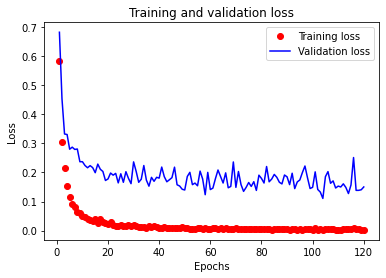

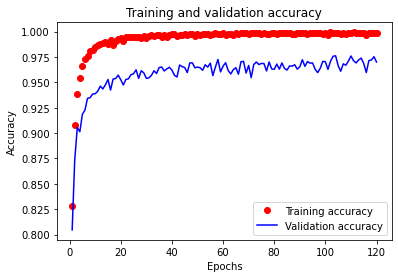

In [58]:
# plot accuracy and loss

#%matplotlib notebook
%matplotlib inline

epochs = range(1, len(train_acc) + 1)

line_train, = plt.plot(epochs, train_loss, 'ro', label ='Training loss')
line_valid, = plt.plot(epochs, valid_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(handles=[line_train, line_valid])


plt.show()

line_train, = plt.plot(epochs, train_acc, 'ro', label ='Training accuracy')
line_valid, = plt.plot(epochs, valid_acc, 'b', label ='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(handles=[line_train, line_valid])

plt.show()

In [34]:
### check accuracy for train/test/validation

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./pretrained_model/lenet_signs")
    train_accuracy, train_loss = evaluate(X_train_p, y_train_p)
    valid_accuracy, valid_loss = evaluate(X_valid_p, y_valid)
    test_accuracy, test_loss = evaluate(X_test_p, y_test)
    print("\Final train set images prediction Accuracy = {:.3f}".format(train_accuracy)) #:.3f
    print("\Final validation set images prediction Accuracy = {:.3f}".format(valid_accuracy)) #:.3f
    print("\Final test set images prediction Accuracy = {:.3f}".format(test_accuracy)) #:.3f

INFO:tensorflow:Restoring parameters from ./pretrained_model/lenet_signs
\Final train set images prediction Accuracy = 0.996
\Final validation set images prediction Accuracy = 0.970
\Final test set images prediction Accuracy = 0.954


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

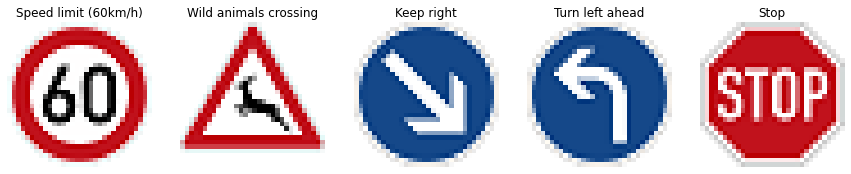

In [39]:

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
img_paths = ['./new_images/1.png', './new_images/2.png', './new_images/3.png', './new_images/4.png', './new_images/5.png']
img_labels = np.array([3, 31, 38, 34, 14])

#read and plot
new_images = []
index = 0
#setup plot
fig, axes = plt.subplots(1, 5, figsize = (15, 4.5))
for mew_image in img_paths:
    img_org = cv2.cvtColor(cv2.imread(mew_image), cv2.COLOR_BGR2RGB)
    new_images.append( normalize_data(img_org) )
    #plot
    axes[index].set_axis_off()
    axes[index].imshow(img_org) #, cmap = 'gray')
    axes[index].set_title(sign_names_df.iloc[img_labels[index]].SignName, fontsize=12)
    index += 1


### Predict the Sign Type for Each Image

In [44]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./pretrained_model/lenet_signs")
    new_accuracy, new_loss = evaluate(new_images, img_labels)
    print("\nNew images prediction Accuracy = {:.3f}".format(new_accuracy)) #:.3f

INFO:tensorflow:Restoring parameters from ./pretrained_model/lenet_signs

New images prediction Accuracy = 1.000


In [ ]:
# pd.unique(sign_names_df.SignName)
# sign_names_df

#plt.imshow(X_train[y_train==38][100])

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

#displayed in previous step

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [70]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./pretrained_model/lenet_signs")
    top_k_predictions = sess.run(top_k, feed_dict={x: new_images, dropout_keep_prob: 1.0})

    for i in range(5):
        print("----------------------------------------------")
        print("Original label:",sign_names_df.iloc[img_labels[i]].SignName)
        print("----------------------------------------------")
        #print predictions
        for j in range(5):
            print("Prediction #{} '{}' ({})".format(j+1
                                                    , sign_names_df.iloc[top_k_predictions[1][i][j]].SignName
                                                    , top_k_predictions[0][i][j] ) )

INFO:tensorflow:Restoring parameters from ./pretrained_model/lenet_signs
----------------------------------------------
Original label: Speed limit (60km/h)
----------------------------------------------
Prediction #1 'Speed limit (60km/h)' (1.0)
Prediction #2 'Speed limit (80km/h)' (1.4333262495728333e-13)
Prediction #3 'Speed limit (50km/h)' (4.185717864486552e-16)
Prediction #4 'Yield' (1.3042525071990115e-20)
Prediction #5 'No passing for vehicles over 3.5 metric tons' (2.807825815220039e-21)
----------------------------------------------
Original label: Wild animals crossing
----------------------------------------------
Prediction #1 'Wild animals crossing' (1.0)
Prediction #2 'Double curve' (8.386529872636788e-19)
Prediction #3 'Slippery road' (4.821752353940853e-26)
Prediction #4 'No passing for vehicles over 3.5 metric tons' (1.2011530339888726e-28)
Prediction #5 'General caution' (9.57877744883946e-34)
----------------------------------------------
Original label: Keep right
